In [ ]:
from google.colab import drive
drive.mount("/content/drive")

In [ ]:
! test -a converted.zip || ( cp /content/drive/MyDrive/converted.zip . && cp -r /content/drive/MyDrive/models . && unzip converted.zip )

In [11]:
from models.SeparatingStyleAndContent.datasets_dataloaders import create_gw_loaders

BATCH_SIZE = 16
NSAMPLES = 5
DIRECTORY = "converted/"

train_loader, test_loader = create_gw_loaders(nsamples=NSAMPLES, batch_size=BATCH_SIZE, dataset_lens=(10000, 2000), directory=DIRECTORY)


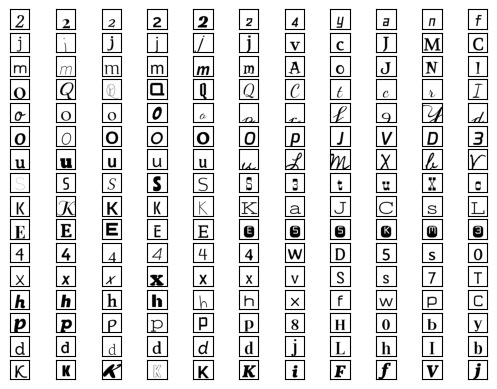

In [12]:
import matplotlib.pyplot as plt
from itertools import product

import torch

for (content_b, style_b), target_b in train_loader:

    _, sps = plt.subplots(BATCH_SIZE, NSAMPLES * 2 + 1)


    for i, j in product(range(BATCH_SIZE), range(NSAMPLES * 2 + 1)):
        sps[i, j].set_xticks([])
        sps[i, j].set_yticks([])
    for i in range(BATCH_SIZE):

        for j in range(NSAMPLES):
            sps[i, j].imshow(content_b[i][j].permute(1, 2, 0), cmap='gray')
        sps[i, NSAMPLES].imshow(target_b[i].permute(1, 2, 0), cmap='gray')

        for j in range(NSAMPLES):
            sps[i, j + NSAMPLES + 1].imshow(style_b[i][j].permute(1, 2, 0), cmap='gray')

    break

# print(batches)


In [13]:
from models.SeparatingStyleAndContent.model import SeparatingStyleAndContent as Model
from models.SeparatingStyleAndContent.model import separating_style_and_content_loss as loss_fn

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

model = Model(NSAMPLES).to(DEVICE)
optimizer = torch.optim.Adam(lr=0.0002, params=model.parameters())

print(DEVICE)

cpu


In [14]:
from models.SeparatingStyleAndContent.test_train_loop import train_test_routine

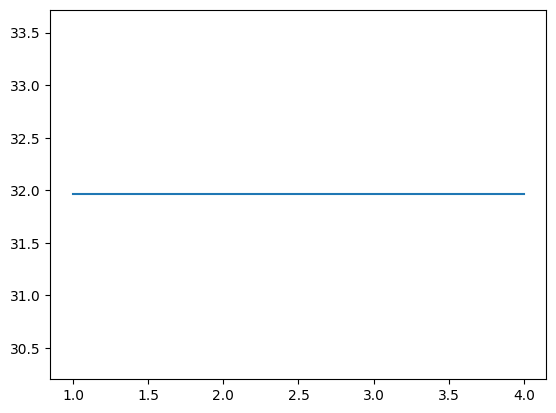

Epoch 5: test:  25%|██▌       | 4/16 [00:07<00:22,  1.90s/it]


KeyboardInterrupt: 

In [15]:
train_test_routine(model=model, optimizer=optimizer, lossfn=loss_fn, testloader=test_loader, trainloader=train_loader, device=DEVICE)